In [96]:
import spacy
import pandas as pd
from datetime import datetime

In [97]:
# Load the English language model
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    # Tokenize the text
    doc = nlp(text)
    
    # Lemmatize and remove stopwords
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop]
    
    return " ".join(tokens)


In [130]:
# Open the text file for reading 
file_path = 'dictOfTitles.txt'

# Initialize an empty dictionary to store the data
data_dict = {}

# Open the file for reading
with open(file_path, "r") as file:
    for line in file:
        # Split the line into key and value based on the colon
        parts = line.strip().split(": ")
        
        # Check if there are exactly two parts (key and value)
        if len(parts) == 2:
            key, value = parts[0], parts[1]
            
            # Convert the value (which is a string containing a list) to an actual list
            # Remove the square brackets and split the string by comma and space
            value = value.strip("[]").split(", ")
            
             # Remove the single quotes from the beginning and end of each element in the list
            value = [item.strip("'") for item in value]
            
            # Remove hyphens from the middle of each element in the list
            value = [item.replace("-", " ") for item in value]
            
            # Store the key-value pair in the dictionary
            data_dict[key] = value


In [131]:
preprocessed_data = {}

for date, titles in data_dict.items():
    preprocessed_titles = [preprocess_text(title) for title in titles]
    preprocessed_data[date] = preprocessed_titles
# Sort the dictionary by keys (dates) in ascending order
preprocessed_data = dict(sorted(preprocessed_data.items()))

In [132]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [143]:
sentiment_scores = []
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound score represents overall sentiment
for key, value in preprocessed_data.items():
    sum = 0
    total = 0
    for text in value:
        sum = sum + get_sentiment_score(text)
        total = total + 1
    sentiment_scores.append(sum/total)
print(get_sentiment_score('things players do that annoy you as a healer'))

-0.4404


In [134]:
# Function to convert full date to "M-D" format
def convert_to_month_day(date_str):
    # Parse the input date string
    parsed_date = datetime.strptime(date_str, "%Y-%m-%d")
    # Format it as "M-D"
    return parsed_date.strftime("%m-%d")
dayData = []
for n in preprocessed_data.keys():
    dayData.append(convert_to_month_day(n))

C:\Users\luckg\AppData\Local\Temp\ipykernel_9492\4064904698.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


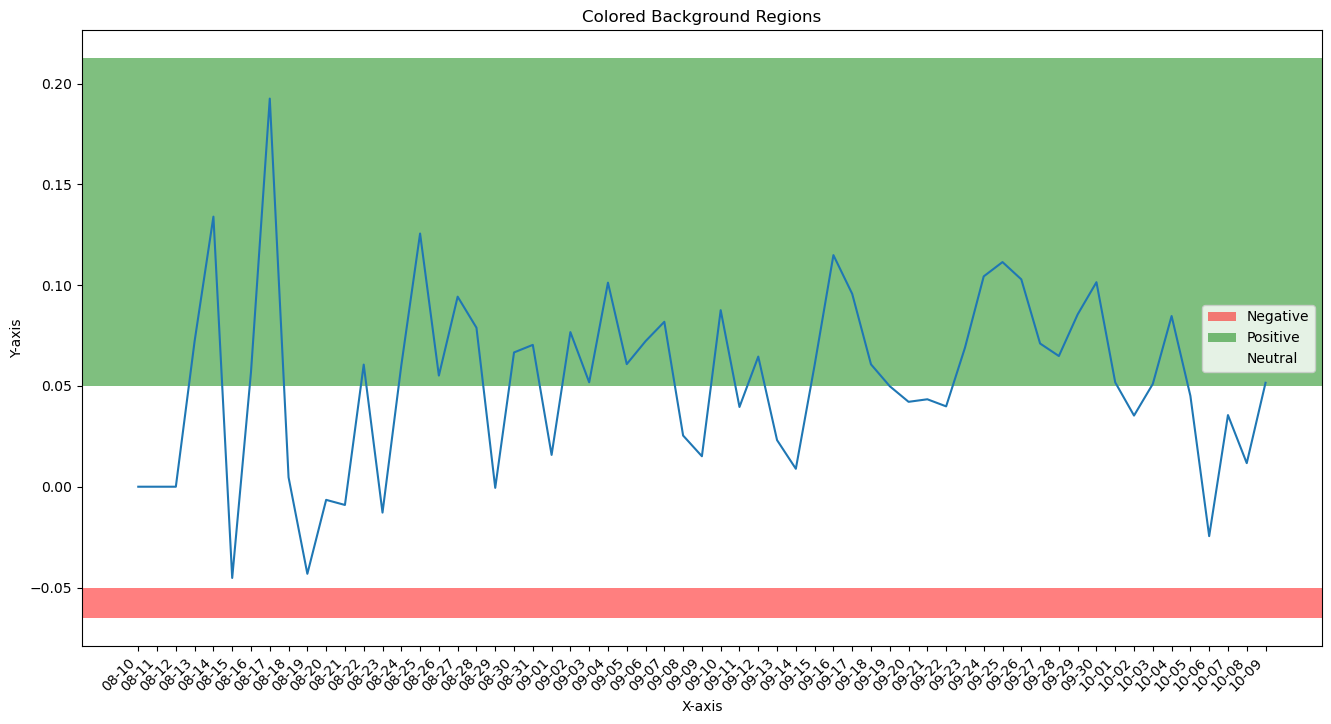

In [144]:
import matplotlib.pyplot as plt

# Create a figure and axis with a larger figsize
fig, ax = plt.subplots(figsize=(16, 8))  # Width: 10 inches, Height: 6 inches

ax.plot(dayData, sentiment_scores)

# Define the shading regions
ax.axhspan(min(sentiment_scores) - 0.02, -0.05, facecolor='red', alpha=0.5, label="Negative")   # Shading below x = -0.05 in red
ax.axhspan(0.05, max(sentiment_scores) + 0.02, facecolor='green', alpha=0.5, label="Positive")   # Shading above x = 0.05 in green

# Add a dummy element for the "Neutral" category in the legend
ax.plot([], [], color='none', label='Neutral')

# Add labels and a title (customize as needed)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Colored Background Regions')

# Rotate x-axis tick labels vertically with a slight slant (adjust the rotation angle as needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a legend
ax.legend()

# Display the plot
plt.show()
